In [6]:
#Lab 4
import numpy as np
import matplotlib.pyplot as plt

def sigm(x):
    return 1.0/(1.0 + np.exp(-x))
def sigm_prime(x):
    return x*(1.0-x)
def tanh(x):
    return np.tanh(x)
def tanh_prime(x):
    return 1.0 - x**2


In [5]:
import numpy as np


class NeuralNetwork:

    def __init__(self, layers):
        self.activation = sigm
        self.activation_prime = sigm_prime
        self.weights = []
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

           
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            deltas.reverse()

            # backpropagation
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)
                print (deltas)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])


    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))


[[ 0.57886859  0.89908227 -0.80612092]
 [ 0.24414134  0.57597747  0.66028088]
 [-0.83685774  0.12566574  0.6672535 ]]
[[-0.04313255]
 [-0.21805688]
 [-0.4155603 ]]
epochs: 0
[array([-0.00151664, -0.00606043, -0.01478512]), array([0.14300224])]
epochs: 10000
[array([-0.01942271,  0.02010925, -0.04851493]), array([0.0854289])]
epochs: 20000
[array([-0.0012598 ,  0.00072876, -0.00186363]), array([0.00247707])]
epochs: 30000
[array([-0.00055822,  0.00029322, -0.00082416]), array([0.00111529])]
epochs: 40000
[array([-0.00033607,  0.00017968, -0.00052093]), array([0.00070425])]
epochs: 50000
[array([-0.00021893,  0.00012913, -0.00036663]), array([0.00049432])]
epochs: 60000
[array([-1.74228147e-04,  9.54746895e-05, -2.83076500e-04]), array([0.00038707])]
epochs: 70000
[array([-1.41666939e-04,  7.81974653e-05, -2.35029214e-04]), array([0.00032081])]
epochs: 80000
[array([-1.17489228e-04,  6.53005006e-05, -1.97605542e-04]), array([0.00027064])]
epochs: 90000
[array([ 3.26955169e-06, -4.9883954

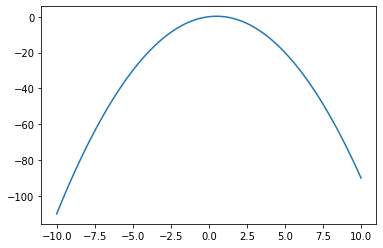

In [7]:
%matplotlib inline
x = np.linspace(-10.0,10.0,100)
sig = sigm_prime(x)
plt.plot(x,sig)
